# 混沌與可預報度 hw1

## Question 1

### (a) 在 $(x,y,z)=(0,0,0)$ 的線性化與穩定性判定

Lorenz63 系統:

$$
\begin{equation}
\left\{
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
\right.
\end{equation} \tag{1}
$$


**假設**在平衡點附近線性化 $\begin{equation} \left\{ \begin{aligned}  x&= x_{ref} +\delta x \\ y &= y_{ref} +\delta y \\ z &= z_{ref} +\delta z \end{aligned} \right.\end{equation}$ 則可得到線性化的矩陣形式和 $J(x,y,z)$

$$
\frac{d}{dt} \begin{bmatrix}\delta x\\ \delta y\\ \delta z\\ \end{bmatrix} =
\underbrace{\begin{bmatrix}
-\sigma & \sigma & 0\\
\rho - z & -1 & -x\\
y & x & -\beta
\end{bmatrix}}_{J(x,y,z)}
\begin{bmatrix}\delta x\\ \delta y\\ \delta z\\ \end{bmatrix}
$$

計算 $J(0,0,0)$ 的三個特徵值並根據題目給定的參數（$\sigma=10,\ \beta=\tfrac{8}{3},\ \rho=24.74$）判斷穩定性

$$
\begin{aligned}
J(0,0,0) \mathbf{v} &= \lambda \mathbf{v} \\
\det(J(0,0,0) - \lambda I) &= 0 \\
-(\beta +\lambda)((\sigma +\lambda)(1+\lambda)-\rho \sigma)&= 0
\end{aligned}
$$

$$
\lambda = ( -\beta,\quad \frac{-(\sigma+1)}{2}+\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)},\quad \frac{-(\sigma+1)}{2}-\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)} \quad ) \\
\lambda \approx (-2.66666667,\; 10.86001222,\; -21.86001222 )
$$
  
解釋與結論：

* 有一個特徵值 $\lambda\approx 10.86001222>0$ :表示存在一個沿該特徵向量的**指數發散的mode**，系統在原點是不穩定的
* 其它兩個特徵值為負則表示在對應方向上是收斂的，但由於存在正實部的特徵值所以整體還是不穩定

---

In [ ]:
import numpy as np
from scipy.linalg import eig, solve_continuous_lyapunov


sigma , beta , rho = 10 , 8/3 , 24.74
x_ref , y_ref , z_ref = 0 , 0 , 0

A = np.array([[-sigma , sigma , 0],
        [rho-z_ref , -1 , -x_ref],
        [y_ref , x_ref , -beta]])
w, v = eig(A)             # w = eigenvalues
print("eigenvalues:", w)
print("eigenvector:", v)

eigenvalues: [-21.86001222+0.j  10.86001222+0.j  -2.66666667+0.j]
eigenvector: [[-0.64461164 -0.4322811   0.        ]
 [ 0.76451019 -0.9017389   0.        ]
 [ 0.          0.          1.        ]]


### (b)在其他點作穩定性判定

其他點的 $\lambda$ 解析解恐怕不是那麼好求，以下跑了10個隨機的點求特徵值分析穩定性，可以觀察到一些事情:

1. **恆有一個大負實的特徵值(−18 到 −22)**

   每個random seed都有一個明顯負且絕對值相較於大的實數特徵值(`-20.08, -22.00, -19.73, ...`)，表示在每個參考點都存在一個**強烈收縮方向**

2. **其餘兩個特徵值在不同seed間會切換型態**

   * 兩個特徵值有時是一對**複共軛**(例如 `2.16 ± 7.48i`, `2.79 ± 7.41i`)，表現為螺旋發散($\Re[\lambda]>0$)、螺旋收縮($0>\Re[\lambda]$)
   * 兩個特徵值有時是兩個**實根**（例如 `(9.1276 ,-0.79036)`, `(7.8942,-1.83039)`，通常一正一負(saddle)

3. **特徵向量方向有共同性(可能因為我取的空間太近了)**

   * 對於那個大負特徵值，對應的特徵向量x,y分量往往大小相近、符號相反(例如 [-0.70, 0.71, 0.06] 或 [0.64, -0.73, -0.21])，z分量較小

   * 對應到複共軛的兩個向量常在z分量有較大權重，表明那對振盪行為在z分量上貢獻較大

   
   一個快速收縮方向主要在x-y平面有分量，而振盪/展開分量常有z分量


Lorenz63 的混沌機制需要同時有**局部展開**和**收縮**，數據觀察到的恆定大負值提供了收縮；其它一正(或複共軛實部正)的特徵值提供了展開/旋轉，導致軌道在相空間被拉長和壓扁的根源

而從數學上來看 $\mathrm{Tr}(J) < 0$ 表示該渾沌模型的體積將會不斷縮小並在無限次疊代後被壓縮到一個平面






In [ ]:
import numpy as np
from scipy.linalg import eig, solve_continuous_lyapunov
import matplotlib.pyplot as plt


for random_seed in range(10):
  np.random.seed(random_seed)
  print(f'random_seed : {random_seed}')

  sigma , beta , rho = 10 , 8/3 , 24.74
  x_ref , y_ref , z_ref = np.random.rand(3) * 10
  print(f'  x_ref , y_ref , z_ref = {x_ref , y_ref , z_ref}')

  A = np.array([[-sigma , sigma , 0],
          [rho-z_ref , -1 , -x_ref],
          [y_ref , x_ref , -beta]])
  w, v = eig(A)             # w = eigenvalues

  print(" eigenvalues:", w)
  print(" eigenvector:", v)

random_seed : 0
  x_ref , y_ref , z_ref = (np.float64(5.4881350392732475), np.float64(7.151893663724195), np.float64(6.027633760716439))
 eigenvalues: [-20.07687401+0.j          3.20510367+0.8680627j   3.20510367-0.8680627j]
 eigenvector: [[-0.70288306+0.j          0.33795894+0.03859228j  0.33795894-0.03859228j]
 [ 0.7082864 +0.j          0.44292823+0.08029846j  0.44292823-0.08029846j]
 [ 0.06546582+0.j          0.82562772+0.j          0.82562772-0.j        ]]
random_seed : 1
  x_ref , y_ref , z_ref = (np.float64(4.17022004702574), np.float64(7.203244934421581), np.float64(0.0011437481734488664))
 eigenvalues: [-22.00385924+0.j   9.12755557+0.j  -0.790363  +0.j]
 eigenvector: [[ 0.63837659 -0.39793123  0.16553748]
 [-0.76629827 -0.76114518  0.15245401]
 [-0.07254158 -0.51216086  0.97434856]]
random_seed : 2
  x_ref , y_ref , z_ref = (np.float64(4.359949021420038), np.float64(0.25926231827891333), np.float64(5.496624778787091))
 eigenvalues: [-19.73047431+0.j   7.89419785+0.j  -1.830390

### (c) 方程組(1)忽略 $z$ 做顯式Euler時間離散，並與放大因子比較

#### 連續系統的特徵值

忽略 $z$ 和(a)一樣**假設**在平衡點附近線性化 $\begin{equation} \left\{ \begin{aligned}  x&= x_{ref} +\delta x \\ y &= y_{ref} +\delta y \end{aligned} \right.\end{equation}$ 則可得到線性化的矩陣形式和時間連續的$J_c(x,y)$

$$
\frac{d}{dt} \begin{bmatrix}\delta x\\ \delta y\\ \end{bmatrix} =
\underbrace{\begin{bmatrix}
-\sigma & \sigma \\
\rho & -1 \\
\end{bmatrix}}_{J_c(x,y)}
\begin{bmatrix}\delta x\\ \delta y\\ \end{bmatrix}
$$

計算 $J_c(0,0)$ 的兩個特徵值並帶入題目給定的參數（$\sigma=10,\ \beta=\tfrac{8}{3},\ \rho=24.74$）

$$
\begin{aligned}
J_c(0,0) \mathbf{v} &= \lambda_c \mathbf{v} \\
\det(J_c(0,0) - \lambda_c I) &= 0 \\
(\sigma +\lambda_c)(1+\lambda_c)-\rho \sigma&= 0
\end{aligned}
$$

$$
\lambda_c = ( \frac{-(\sigma+1)}{2}+\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)},\quad \frac{-(\sigma+1)}{2}-\frac{1}{2}\sqrt{(\sigma+1)^2-4\sigma(1-\rho)} \quad ) \\
\boxed{\lambda_c \approx (10.86001222,\; -21.86001222  )}
$$
  
#### 離散系統的特徵值


$$
\dot{\mathbf{x}}^{n+1} = J_c \mathbf{x}^n,\qquad
\mathbf{\mathbf{x}^{n}}=\begin{bmatrix}x\\y\end{bmatrix},\quad
J_c=\begin{bmatrix}-\sigma & \sigma\\ \rho & -1\end{bmatrix}.
$$

顯式Euler（forward Euler）離散時間步長 $\Delta t$：


$$
\begin{aligned}
\mathbf{x}^{n+1} &= \mathbf{x}^n + \Delta t J_c \mathbf{x}^n = (I+\Delta t J_c)\mathbf{x}^n \\
&= M(\Delta t)\,\mathbf{x}^n,\qquad M\stackrel{\mathrm{let}}{=}I + \Delta t\,J_c
\end{aligned}
$$

若假設解呈比例增長（$\mathbf{x}^n\propto \lambda^n_d$），則 $\lambda_d$ 為 $M$ 的特徵值。當 $\Delta t$ 很小時，$\boxed{\lambda_d \approx 1 + \lambda_c \Delta t}$

#### 放大因子( $\lambda_d$ )與穩定條件


* 若Lorenz63在連續系統是收縮 $\Re[\lambda_c]<0$ ，要在離散上也呈衰減必須滿足 $\left| \lambda_d \right| <1 $

  $$
  \left|1+\Delta t \lambda_c \right| < 1
  $$

  若 $\lambda_c$ 為實負數(例如 $\lambda_{c1} \approx -21.86$ )，這給出條件
  
  $$
  -1 < 1 -21.86\Delta t < 1 \quad\Longrightarrow\quad \boxed{ 0 < \Delta t < \frac{2}{21.86}\approx 0.0915 }
  $$

  也就是對 $\lambda_{c1}$ 這個快速負模態，顯式Euler的 $\Delta t$ 要小於約 0.0915 才不會在數值上變成振盪或放大。

* 若Lorenz63在連續系統是不穩定 $\Re[\lambda_c]>0$ ，例如($\lambda_{c2} \approx 10.86)$，則離散放大因子為 $\lambda_d=1+\Delta t\cdot10.86>1$ (對任何 $\Delta t_d>0)$，因此離散也會表現為放大 $(|\lambda|>1)$ 。這與連續系統一致都是不穩定，但數值的**成長速率/每步放大倍數**會因 $\Delta t$ 而不同。

#### 精度比較:離散放大 $\lambda_d$ 和 連續真解的每步成長 $e^{\lambda_c \Delta t}$

連續系統的增長因子是 $e^{\lambda_c \Delta t}$

$$
e^{\lambda_c\Delta t}=1+\lambda_c\Delta t+\frac{1}{2}\lambda_c^2\Delta t^2+\mathcal{O}(\Delta t^3)
$$

因此誤差的主項約為 $\frac{1}{2}\lambda_c^2\Delta t^2$ ，若想讓離散放大因子與連續真解接近，則需要絕對誤差小或是相對誤差小。用絕對誤差估計會得到

$$
\frac{1}{2} \left| \lambda_c \right|^2\Delta t^2 \ll \left|\lambda_c\right| \Delta t \quad\Rightarrow\quad \Delta t \ll \frac{1}{\left|\lambda_c\right|}.
$$

用相對誤差估計，並要求相對誤差 $< 10\% $ 會得到：

$$
\frac{ \frac{1}{2} \left| \lambda_c \right|^2\Delta t^2 } {\left|\lambda_c\right| \Delta t }< 10\% \quad\Rightarrow\quad \Delta t < \frac{0.2}{\left|\lambda_c\right|}
$$

代入數值：

* 對快速負模態( $\left|\lambda_{c1}\right|\approx 21.86$ ): $\boxed{\begin{equation} \left\{ \begin{aligned}  \Delta t& \ll 0.0457 \\ \Delta t& < 0.0091 \end{aligned} \right.\end{equation}}$
* 對正模態 ( $\left|\lambda_{c2}\right|\approx 10.86$ ):$\boxed{\begin{equation} \left\{ \begin{aligned}  \Delta t& \ll 0.0921 \\ \Delta t& < 0.0184 \end{aligned} \right.\end{equation}}$


#### $\Delta t$ 選取

因此**準確性**上，正模態（成長）和負模態（快速收縮）都要求 Δt **遠小於** 0.1，特別是若你想讓離散的成長率與連續的指數成長 (e^{\mu\Delta t}) 接近到 10% 則 Δt 需要大約小於 0.009–0.018。

* 當 $0.0915<\Delta t$ ，則離散系統的放大因子在本應衰減的模式在數值上發散、在成長和衰減處與連續系統的相對誤差也會大於 $10\%$

* 當 $\underline{0<\Delta t<0.0091}$ ，則離散系統的放大因子在衰減處可以變小、在成長和衰減處與連續系統的相對誤差也會小於 $10\%$


## Question 2

### 1. Euler和RK4的比較討稐

透過數值實驗中比較了 **Forward Euler** 與 **RK4** 在 Lorenz 系統下的穩定性表現，固定積分時間 $T=50$ 並針對不同時間步長 $\Delta t$ 檢視是否能夠維持蝴蝶吸引子的結構。

在數值模擬中:

* **Euler 方法**：在 $\underline{\Delta t= 0.02}$ 時仍能維持蝴蝶吸引子的結構，但到了 $\Delta t= 0.05$ 時解便快速發散，數值軌跡爆掉、失去了物理解釋。

* **RK4 方法**：RK4 在 $\underline{\Delta t = 0.08}$ 時仍然穩定，但到了 $\Delta t = 0.1$ 就明顯失效。

綜合來看，Euler 方法的可接受步長上限約在 $\Delta t \approx 0.02$ ，而 RK4 則可放寬到 $\Delta t \approx 0.08$ ，這與直覺上「高階方法具有更大穩定域與更高精度」的預期一致。RK4在Loremz63提供了約 **4 倍於 Euler 的最大可行時間步長**。

```{mote}
為了確保RK4真的在Δt=0.1不是因為積分時間不夠(T=50)而無法畫出蝴蝶，特意跑一組1000倍積分時間T=50000的個案，也確定畫不出蝴蝶。
至此就可以說明Δt=0.1是RK4的上限。
```

---
### 2. 精度主導時 $\Delta t$ 在RK4應該比Euler多多少

如果不考慮「穩定性」這個硬限制只用「誤差階數」比較：

* Euler 誤差：$O(\Delta t^1)$
* RK4 誤差：$O(\Delta t^4)$

要達到相同誤差 $\varepsilon$ ，兩者的 Δt 應滿足

$$
(\Delta t_{\text{Euler}})^1 \sim (\Delta t_{\text{RK4}})^4
\implies \Delta t_{\text{RK4}} \sim (\Delta t_{\text{Euler}})^{1/4}
$$

或者寫成 **RK4可以比Euler大多少倍**

$$
\frac{\Delta t_{\text{RK4}}}{\Delta t_{\text{Euler}}} \sim \frac{1}{\Delta t_{\text{Euler}}^{3/4}} \sim 18.8 \big|_{\Delta t_{\text{Euler}}=0.02}
$$

但在數值上RK4只有Euler大4倍可能是Lorenz系統特有的結果，要再使用Question 1的方式計算RK4 $\Delta t$ 的穩定性、收斂適用區間


/tmp/ipython-input-1800705752.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dy = x * (rho - z) - y
/tmp/ipython-input-1800705752.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dz = x * y - beta * z
/tmp/ipython-input-1800705752.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  dy = x * (rho - z) - y
/tmp/ipython-input-1800705752.py:21: RuntimeWarning: invalid value encountered in add
  traj[n+1] = traj[n] + dt * lorenz(traj[n])


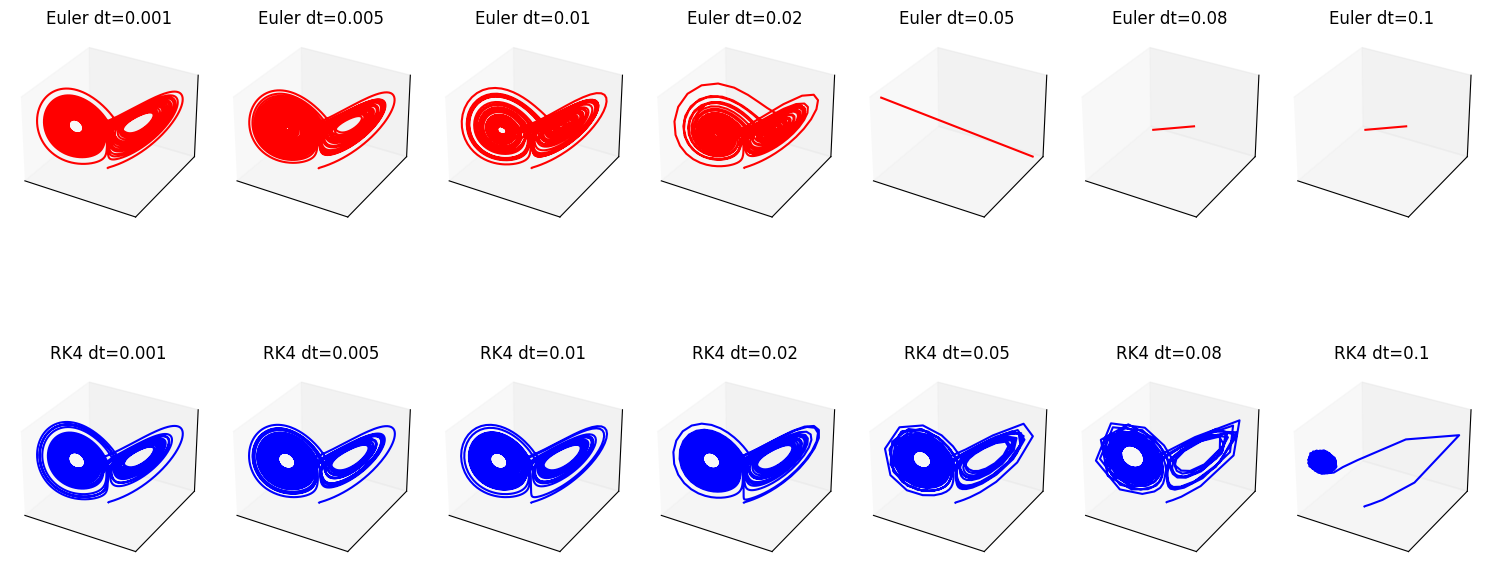

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plot_it = False
# Lorenz parameters
sigma = 10.0
beta = 8.0/3.0
rho = 24.74

def lorenz(state):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Forward Euler scheme
def integrate_euler(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        traj[n+1] = traj[n] + dt * lorenz(traj[n])
    return traj

# RK4 scheme
def integrate_rk4(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        k1 = lorenz(traj[n])
        k2 = lorenz(traj[n] + 0.5*dt*k1)
        k3 = lorenz(traj[n] + 0.5*dt*k2)
        k4 = lorenz(traj[n] + dt*k3)
        traj[n+1] = traj[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return traj

# Initial condition near equilibrium
x0 = np.array([0.1, 0.0, 0.0])

# Fixed total integration time
T = 50.0

# Candidate dt values
dt_list = [0.001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1]

if plot_it :
  fig = plt.figure(figsize=(15, 8))

  for i, dt in enumerate(dt_list):
      nsteps = int(T / dt)   # 保持 T 固定
      traj_euler = integrate_euler(x0, dt, nsteps)
      traj_rk4 = integrate_rk4(x0, dt, nsteps)

      # Euler plot
      ax = fig.add_subplot(2, len(dt_list), i+1, projection="3d")
      ax.plot(traj_euler[:,0], traj_euler[:,1], traj_euler[:,2], color="red")
      ax.set_title(f"Euler dt={dt}")
      ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

      # RK4 plot
      ax = fig.add_subplot(2, len(dt_list), i+1+len(dt_list), projection="3d")
      ax.plot(traj_rk4[:,0], traj_rk4[:,1], traj_rk4[:,2], color="blue")
      ax.set_title(f"RK4 dt={dt}")
      ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])

  plt.tight_layout()
  plt.savefig("hw1-2_lorenz_stability.png")
  plt.show()


/tmp/ipython-input-3096243928.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dy = x * (rho - z) - y
/tmp/ipython-input-3096243928.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dz = x * y - beta * z
/tmp/ipython-input-3096243928.py:13: RuntimeWarning: invalid value encountered in scalar subtract
  dz = x * y - beta * z
/tmp/ipython-input-3096243928.py:21: RuntimeWarning: invalid value encountered in add
  traj[n+1] = traj[n] + dt * lorenz(traj[n])


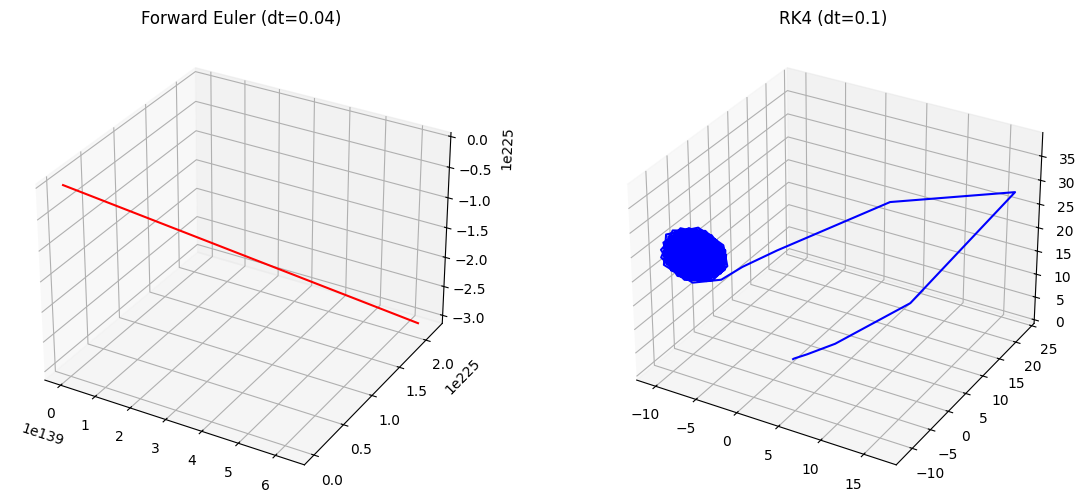

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

run_it = False
# Lorenz parameters
sigma = 10.0
beta = 8.0/3.0
rho = 24.74

def lorenz(state):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

# Forward Euler scheme
def integrate_euler(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        traj[n+1] = traj[n] + dt * lorenz(traj[n])
    return traj

# RK4 scheme
def integrate_rk4(x0, dt, nsteps):
    traj = np.zeros((nsteps, 3))
    traj[0] = x0
    for n in range(nsteps-1):
        k1 = lorenz(traj[n])
        k2 = lorenz(traj[n] + 0.5*dt*k1)
        k3 = lorenz(traj[n] + 0.5*dt*k2)
        k4 = lorenz(traj[n] + dt*k3)
        traj[n+1] = traj[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return traj

# initial condition near equilibrium
x0 = np.array([0.1, 0.0, 0.0])

if run_it :
  # Try Euler
  dt_euler = 0.002 *20 # you can increase this until it blows up (~0.01 might still work, >0.02 unstable)
  steps = 500000
  traj_euler = integrate_euler(x0, dt_euler, steps)

  # Try RK4
  dt_rk4 = 0.1   # RK4 allows larger dt, can even go up to ~0.05 stably
  traj_rk4 = integrate_rk4(x0, dt_rk4, steps)

  # Plot comparison
  fig = plt.figure(figsize=(14,6))

  ax1 = fig.add_subplot(121, projection='3d')
  ax1.plot(traj_euler[:,0], traj_euler[:,1], traj_euler[:,2], color='red')
  ax1.set_title(f"Forward Euler (dt={dt_euler})")

  ax2 = fig.add_subplot(122, projection='3d')
  ax2.plot(traj_rk4[:,0], traj_rk4[:,1], traj_rk4[:,2], color='blue')
  ax2.set_title(f"RK4 (dt={dt_rk4})")

  plt.savefig("hw1-2_lorenz_stability_note.png")
  plt.show()


## Question 3


### 1. ODE-1

$$
\frac{dx}{dt} = -3x  \\
x(t) = x_0 e^{-3t}
$$

For decaying systems, the **characteristic time** is the **efolding time**.

$$
\underline {\tau = \frac{1}{\text{decay rate}} = \frac{1}{3}}
$$


---

### 2. ODE-2

$$
\frac{d^2x}{dt^2} + 9x = 0 \\
\frac{d^2x}{dt^2} + \omega^2 x = 0 \implies \omega = \pm 3
$$

For oscillating systems, the **characteristic time** is the **inverse of angular frequency**

$$
\underline {\tau = \frac{1}{\omega} = \frac{1}{3}}
$$


---

### 3. Forced ODE

$$
\frac{d^2x}{dt^2} + 9x = k \sin(\frac{t}{k}),\quad k \in \mathbb{R}^+
,x(0)=0,x'(0)=1
$$
#### Laplace transform


$$
\begin{aligned}
\frac{d^2x}{dt^2} + 9x &= k \sin(\frac{t}{k}) \\
\mathcal{L}[x''] + 9 \mathcal{L}[x] &= k \mathcal{L}[\sin(\frac{t}{k})] \\
s( sX(s) -  x(0)) - x'(0)+ 9 X(s)&= k \cdot \frac{1/k}{s^2 + (1/k)^2} \\
s^2 X(s) - 1 + 9 X(s) &= \frac{1}{s^2 + 1/k^2} \\
X(s) &= \frac{1}{s^2 + 9} + \frac{1}{(s^2+9)(s^2 + 1/k^2)} \\
X(s) &= \frac{1}{s^2 + 9} + \frac{-k^2}{9k^2-1}\frac{1}{3}\frac{3}{(s^2+9)}+\frac{k^2}{9k^2-1}k\frac{1/k}{(s^2 + 1/k^2)} \\
x(t) &= \underbrace{\frac{1}{3} \sin(3t)}_{\text{homogeneous from IC}} +
\underbrace{\frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})}_{\text{forced response term}}
\end{aligned}
$$

---

#### Dominant term

* Homogeneous solution 的頻率 $\omega_{hom} = 3 \Rightarrow \tau_{hom} = \frac{1}{3}$
* Forcing 的頻率 $\omega_f = \frac{1}{k} \Rightarrow \tau_{forcing} = k$
* Forcing 碰到系統的響應頻率 $\omega_s = 3 \Rightarrow \tau_{s} = \frac{1}{3}$

**Dominant term頻率分段討論**

1. **Slow forcing:** $k \gg \frac{1}{3} $ → 以系統的自然震盪頻率為主$\tau \approx \frac{1}{3}$ characteristic time是 $\frac{1}{3}$ ， $x(t)$ 會緩慢隨時間增長

$$
\begin{aligned}
&\lim_{k \gg 1/3}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})] \\
&\lim_{k \gg 1/3}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2}\sin(3t)+\frac{k^3}{9k^2}\sin(\frac{t}{k})] \\
= & \frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-1}{9}\sin(3t)+\frac{1}{9}t
\end{aligned}
$$

2. **Fast forcing:** $k \ll \frac{1}{3}$ → 以系統的自然震盪頻率為主$\tau \approx \frac{1}{3}$ characteristic time是 $\frac{1}{3}$

$$
\begin{aligned}
&\lim_{k \to 0}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})] \\
= & \frac{1}{3} \sin(3t)+ 0
\end{aligned}
$$

3. **Resonance:**  $k \approx \frac{1}{3}$ → 外力的頻率和系統的自然震盪頻率接近→ 共振(震幅變無限大) → characteristic time 會接近 $\frac{1}{3}$


## Question 4

**解釋數學步驟**

我要一步步展示過程，並包含數學運算與假設，像是討論在 \(x\) 的週期性或邊界處的消失狀況。我會顯示總 \(x\)-導數的平均值為零。接着，利用分部積分法來推導關聯。最後，我會提供簡明的總結。
### 展開雅可比子並把 x 平均寫清楚

定義雅可比子
$$
\[
J(\psi,q)=\frac{\partial\psi}{\partial x}\frac{\partial q}{\partial y}-\frac{\partial\psi}{\partial y}\frac{\partial q}{\partial x}.
\]
$$
把兩項重寫成總導數的差（用乘積法則逆向整理）：
$$
J(\psi,q)
=\frac{\partial}{\partial x}\big(\psi\,\frac{\partial q}{\partial y}\big)
-\frac{\partial}{\partial y}\big(\psi\,\frac{\partial q}{\partial x}\big).
$$

現在定義對 x 的平均（取長度 L，或理解為週期平均）：
$$
\overline{(\cdot)}(y,z,t)\equiv\frac{1}{L}\int_{0}^{L}(\cdot)\,dx.
$$

對上式在 x 上積分（或取平均）得到
$$
\overline{J(\psi,q)}
=\frac{1}{L}\int_{0}^{L}\frac{\partial}{\partial x}\Big(\psi\frac{\partial q}{\partial y}\Big)\,dx
-\frac{1}{L}\int_{0}^{L}\frac{\partial}{\partial y}\Big(\psi\frac{\partial q}{\partial x}\Big)\,dx.
$$

第一個積分是 x 對總導數的積分，假設 x 方向為週期域或邊界使得 \(\psi\partial_y q\) 在兩端相等，則邊界項消失：
$$
\frac{1}{L}\int_{0}^{L}\frac{\partial}{\partial x}\Big(\psi\frac{\partial q}{\partial y}\Big)\,dx
=\frac{1}{L}\Big[\psi\frac{\partial q}{\partial y}\Big]_{0}^{L}=0.
$$

第二項把 ∂/∂y 提到平均符號外（y 為積分變數以外）：
$$
-\frac{1}{L}\int_{0}^{L}\frac{\partial}{\partial y}\Big(\psi\frac{\partial q}{\partial x}\Big)\,dx
=-\frac{\partial}{\partial y}\Big(\frac{1}{L}\int_{0}^{L}\psi\frac{\partial q}{\partial x}\,dx\Big).
$$

對裡面的積分做分部（對 x 做分部積分，邊界項同樣因週期或零邊界而為零）：
$$
\frac{1}{L}\int_{0}^{L}\psi\frac{\partial q}{\partial x}\,dx
=\frac{1}{L}\Big[\psi q\Big]_{0}^{L}-\frac{1}{L}\int_{0}^{L}q\frac{\partial \psi}{\partial x}\,dx
=-\frac{1}{L}\int_{0}^{L}q\frac{\partial \psi}{\partial x}\,dx.
$$

把它代回去：
$$
\overline{J(\psi,q)}
=-\frac{\partial}{\partial y}\Big(-\frac{1}{L}\int_{0}^{L}q\frac{\partial \psi}{\partial x}\,dx\Big)
=\frac{\partial}{\partial y}\Big(\frac{1}{L}\int_{0}^{L}q\frac{\partial \psi}{\partial x}\,dx\Big).
$$

認出 \(\partial_x\psi=v\)（北向速度），得到恰當的通量形式
$$
\boxed{\displaystyle
\overline{J(\psi,q)}=\frac{\partial}{\partial y}\overline{\,v q\,}\,.}
$$

這個恰好說明了為何雅可比子的 x 平均可以以緯向（y）導數形式寫成 vq 的通量散度。

---

### 為什麼有些項會是 0（具體假設與理由）

1. 邊界/週期條件：在 x 上把總導數積分為邊界項時，我們假設 x 方向為週期（常見於理論推導與模擬）或邊界處 \(\psi\,\partial_y q\)（或 \(\psi q\)）為零。這使得任何形如 \(\int_0^L \partial_x(\cdot)\,dx\) 的項消失。  
2. 因為上述，任何雅可比子的一個分解為 x 總導數的那一部分在取 x 平均後為零。剩下的項經由分部積分轉成 \(\partial_y\) 作用於 \(\overline{v q}\)。  
3. 若場非週期且邊界值非零，則必須保留邊界項；理論上常用週期或無通量邊界以得到上述簡化。

---

### 把結果回到平均場方程的形式

從總方程取 x 平均：

$$
\overline{\partial_t q}+\overline{J(\psi,q)}=\overline{D}.
$$
用剛得到的恆等式代替平均雅可比子：
$$
\frac{\partial\overline{q}}{\partial t}+\frac{\partial}{\partial y}\overline{v q}=\overline{D}.
$$
把平均場與擾動分解 $$\(q=\overline{q}+q',\; v=\overline{v}+v'\)$$ 並使用 \(\overline{v}=0\)（若背景沒有平均北向流）和 \(\overline{q'}=0\) 後，保留擾動對平均的貢獻，得到標準形式
$$
\boxed{\displaystyle
\frac{\partial\overline{q}}{\partial t}=-\frac{\partial}{\partial y}\overline{v'q'}+\overline{D}\,.}
$$

---

若你要，我可以把每一步的積分和分部積分用更具體的符號（把邊界項逐項寫出）逐行展開，但核心就是：把 J 重寫成 x 的總導數減 y 的總導數，利用 x 方向週期或零邊界使 x 上的總導數項消失，再用分部積分把剩下的項寫成 ∂y( v q )。


# 測試

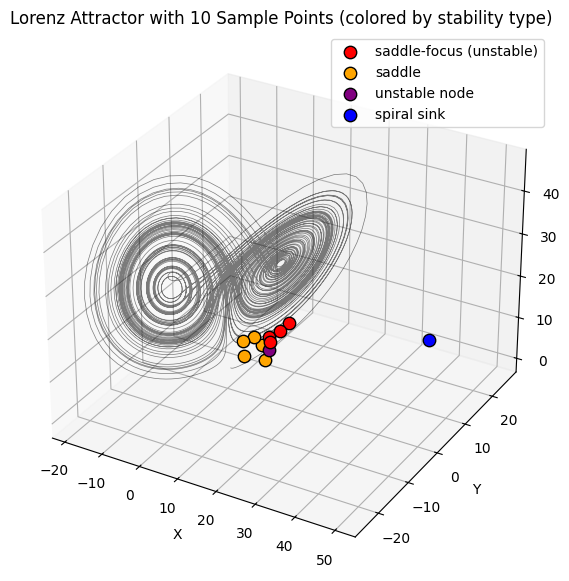

Point 0: (5.4881350392732475, 7.151893663724195, 6.027633760716439) → saddle-focus (unstable)
Point 1: (4.17022004702574, 7.203244934421581, 0.0011437481734488664) → saddle
Point 2: (4.359949021420038, 0.25926231827891333, 5.496624778787091) → saddle
Point 3: (5.507979025745755, 7.081478226181048, 2.9090473891294435) → unstable node
Point 4: (9.670298390136766, 5.4723224917572235, 9.726843599648843) → saddle-focus (unstable)
Point 5: (2.219931710897395, 8.707323061773764, 2.067191553394264) → saddle
Point 6: (8.928601514360016, 3.3197980530117723, 8.212291230578318) → saddle-focus (unstable)
Point 7: (0.7630828937395717, 7.7991879224011464, 4.384092314408935) → saddle
Point 8: (8.734294027918162, 9.68540662820932, 8.691945402139199) → saddle-focus (unstable)
Point 9: (50, 3.0, 20) → spiral sink
Point 10: (0.10374153885699955, 5.018745921487388, 4.957732931341461) → saddle


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz 系統參數
sigma = 10.0
beta = 8/3
rho = 24.74

# Jacobian
def jacobian_lorenz(x, y, z, sigma=10.0, rho=24.74, beta=8/3):
    return np.array([[-sigma, sigma, 0.0],
                     [rho - z, -1.0, -x],
                     [y, x, -beta]], dtype=float)

# 使用者的 10 個點
points = [
    (5.4881350392732475, 7.151893663724195, 6.027633760716439),
    (4.17022004702574, 7.203244934421581, 0.0011437481734488664),
    (4.359949021420038, 0.25926231827891333, 5.496624778787091),
    (5.507979025745755, 7.081478226181048, 2.9090473891294435),
    (9.670298390136766, 5.4723224917572235, 9.726843599648843),
    (2.219931710897395, 8.707323061773764, 2.067191553394264),
    (8.928601514360016, 3.3197980530117723, 8.212291230578318),
    (0.7630828937395717, 7.7991879224011464, 4.384092314408935),
    (8.734294027918162, 9.68540662820932, 8.691945402139199),
    (50, 3.0, 20),
    (0.10374153885699955, 5.018745921487388, 4.957732931341461)
]

# 穩定性分類
def classify_point(x, y, z):
    J = jacobian_lorenz(x, y, z)
    eigvals = np.linalg.eigvals(J)
    real_parts = np.real(eigvals)
    imag_parts = np.imag(eigvals)

    num_pos = np.sum(real_parts > 0)
    if np.any(np.abs(imag_parts) > 1e-6):  # 複數特徵值
        if np.any(real_parts > 0):
            return "saddle-focus (unstable)"
        else:
            return "spiral sink"
    else:  # 全部實數
        if num_pos == 1:
            return "saddle"
        elif num_pos == 2:
            return "unstable node"
        else:
            return "stable node"

types = [classify_point(*p) for p in points]

# 顏色對應
type_colors = {
    "saddle-focus (unstable)": "red",
    "spiral sink": "blue",
    "saddle": "orange",
    "unstable node": "purple",
    "stable node": "green"
}
colors = [type_colors[t] for t in types]

# Lorenz 系統數值積分（Euler 法）
def lorenz_step(x, y, z, dt=0.01):
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return x + dx*dt, y + dy*dt, z + dz*dt

# 吸引子軌跡
n_steps = 10000
dt = 0.01
x, y, z = 0., 1., 1.05
xs, ys, zs = [], [], []
for i in range(n_steps):
    x, y, z = lorenz_step(x, y, z, dt)
    xs.append(x)
    ys.append(y)
    zs.append(z)

# 畫圖
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, color='black', alpha=0.5, linewidth=0.5) #'lightgray'

for (p, c, t) in zip(points, colors, types):
    ax.scatter(*p, color=c, s=80, edgecolor='k', label=t)

# 避免 legend 重複
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys())

ax.set_title("Lorenz Attractor with 10 Sample Points (colored by stability type)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# 輸出分類結果
for i, (p, t) in enumerate(zip(points, types)):
    print(f"Point {i}: {p} → {t}")
